Raw DNA Data
   ↓


Data Validation & QC
   ↓



Encoding Pipeline (One-Hot + k-mers)
   ↓



CNN (Motif Detection)
   ↓


Transformer Encoder (Long-range dependency)
   ↓



Multi-Head Outputs
   ├─ Disease Risk Score (Regression)
   ├─ Promoter Probability
   └─ Enhancer Probability
   ↓


Model Monitoring + Drift Check


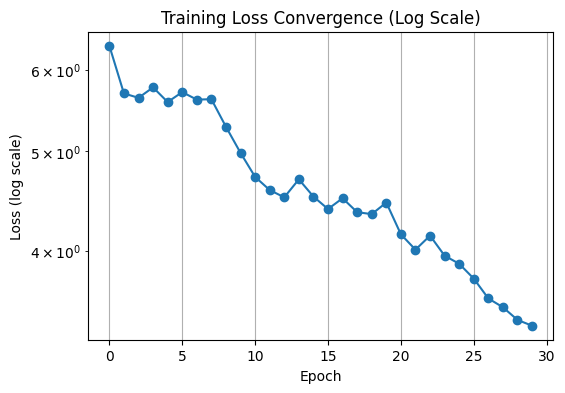

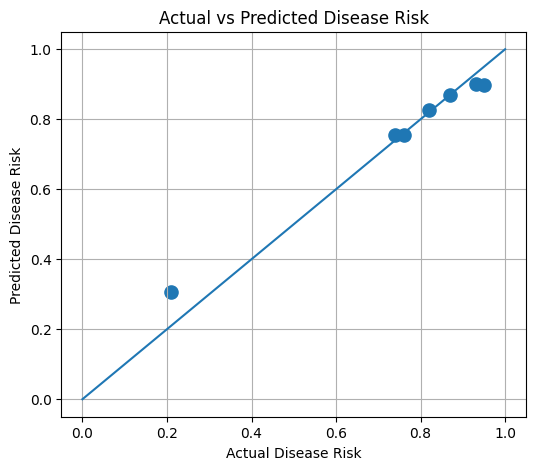

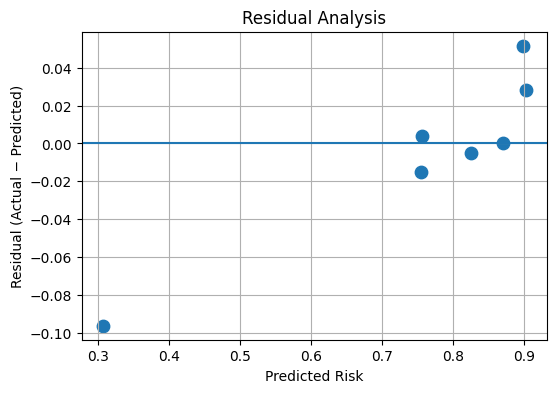

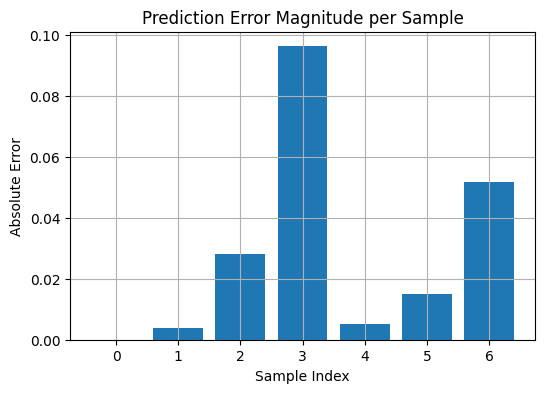

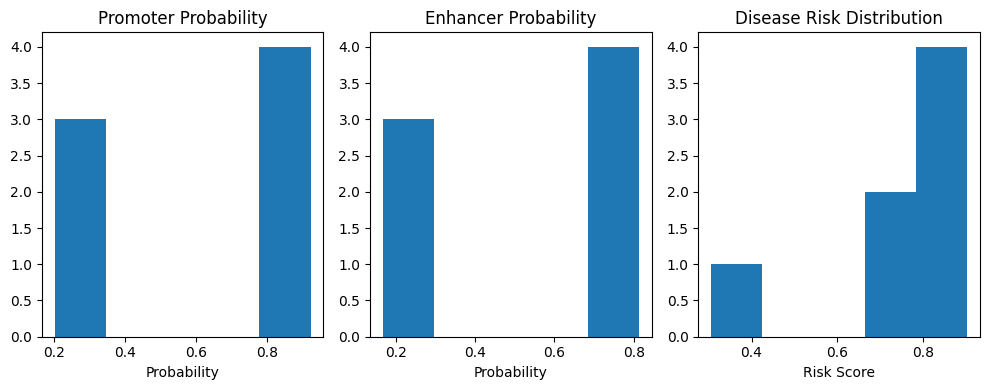

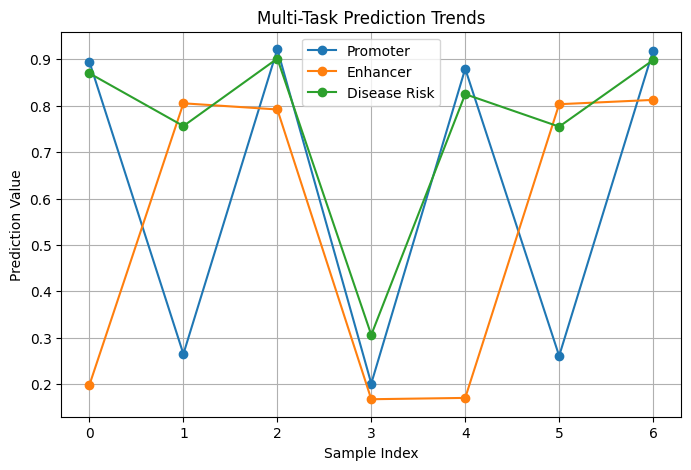

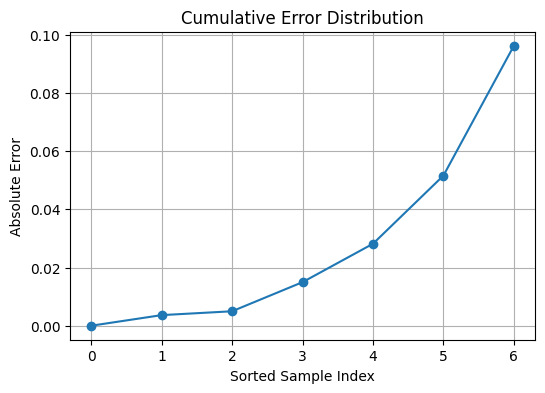

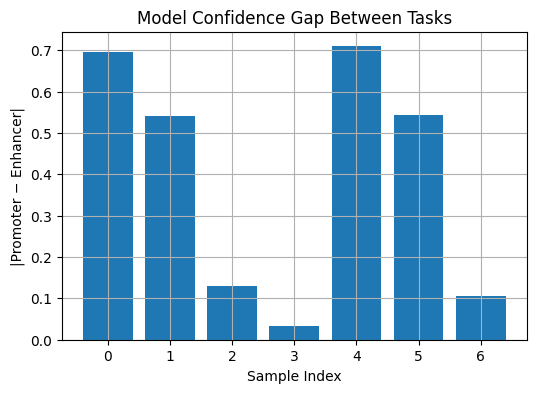

✔ Advanced industrial plots generated successfully


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Convert tensors to numpy safely
promoter_pred = p.detach().cpu().numpy().flatten()
enhancer_pred = e.detach().cpu().numpy().flatten()
risk_pred = r.detach().cpu().numpy().flatten()
risk_actual = y_reg

# ===============================
# 1 Training Loss + Log Scale
# ===============================
plt.figure(figsize=(6,4))
plt.plot(losses, marker='o')
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Training Loss Convergence (Log Scale)")
plt.grid(True)
plt.show()

# ===============================
#  Actual vs Predicted Risk
# ===============================
plt.figure(figsize=(6,5))
plt.scatter(risk_actual, risk_pred, s=90)
plt.plot([0,1], [0,1])
plt.xlabel("Actual Disease Risk")
plt.ylabel("Predicted Disease Risk")
plt.title("Actual vs Predicted Disease Risk")
plt.grid(True)
plt.show()

# ===============================
#  Residual Plot (Bias Check)
# ===============================
residuals = risk_actual - risk_pred

plt.figure(figsize=(6,4))
plt.scatter(risk_pred, residuals, s=80)
plt.axhline(0)
plt.xlabel("Predicted Risk")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residual Analysis")
plt.grid(True)
plt.show()

# ===============================
#  Error Magnitude per Sample
# ===============================
plt.figure(figsize=(6,4))
plt.bar(range(len(residuals)), np.abs(residuals))
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.title("Prediction Error Magnitude per Sample")
plt.grid(True)
plt.show()

# ===============================
#  Probability Distributions
# ===============================
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.hist(promoter_pred, bins=5)
plt.title("Promoter Probability")
plt.xlabel("Probability")

plt.subplot(1,3,2)
plt.hist(enhancer_pred, bins=5)
plt.title("Enhancer Probability")
plt.xlabel("Probability")

plt.subplot(1,3,3)
plt.hist(risk_pred, bins=5)
plt.title("Disease Risk Distribution")
plt.xlabel("Risk Score")

plt.tight_layout()
plt.show()

# ===============================
#  Multi-Task Trend Comparison
# ===============================
plt.figure(figsize=(8,5))
plt.plot(promoter_pred, label="Promoter", marker="o")
plt.plot(enhancer_pred, label="Enhancer", marker="o")
plt.plot(risk_pred, label="Disease Risk", marker="o")
plt.xlabel("Sample Index")
plt.ylabel("Prediction Value")
plt.title("Multi-Task Prediction Trends")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
#  Cumulative Error Analysis
# ===============================
sorted_errors = np.sort(np.abs(residuals))

plt.figure(figsize=(6,4))
plt.plot(sorted_errors, marker="o")
plt.xlabel("Sorted Sample Index")
plt.ylabel("Absolute Error")
plt.title("Cumulative Error Distribution")
plt.grid(True)
plt.show()

# ===============================
#  Model Confidence Gap
# ===============================
confidence_gap = np.abs(promoter_pred - enhancer_pred)

plt.figure(figsize=(6,4))
plt.bar(range(len(confidence_gap)), confidence_gap)
plt.xlabel("Sample Index")
plt.ylabel("|Promoter − Enhancer|")
plt.title("Model Confidence Gap Between Tasks")
plt.grid(True)
plt.show()

print("✔ Advanced industrial plots generated successfully")
